# 2 hidden QHO

## Variational Wavefunction

In [80]:
# using PyPlot

In [81]:
using Plots

## Function definitions

In [82]:
function Ψ(x,b,c1,c2,W1,W2)
    return exp(x*b)*(1.0+exp(c1+x*W1))*(1.0+exp(c2+x*W2))
end;

<span style="color:RED">WE DEFINE A "STUPID" WAVEFUNCTION HERE</span>

$\psi(x)=\begin{cases}Ke^{bx}& x\geq 0\\Ke^{-bx}& x\leq 0\end{cases}$

With the restriction that $b<0$...


In [83]:
function Ψ(x,b,c1,c2,w1,w2)
    # Piecewise symetric wf
    K = (1.0+exp(c1))*(1.0+exp(c2))
    if x<0.0
        return K*exp(-b*x)
    else
        return K*exp(b*x)
    end
end;

In [84]:
# Ψ(x,b,c1,c2,w1,w2) = exp(-0.5*x^2);

Doing analytical calculations, one observes that $K$ is not contributing to the energy, so here $C1$ and $C2$ are not relevant.

In [85]:
B  = -1.;
C  = -5
C1 = C;
C2 = C;
W1 =  0.0;
W2 =  0.0;

In [86]:
Ψ(0,B,C1,C2,W1,W2)

1.0135212939279332

## Definition of the wavefunction

If we take an **even** number of gridpoints, the function at $x=0$ is not defined, meaning we won't have problems with the discontinuity of the derivative.

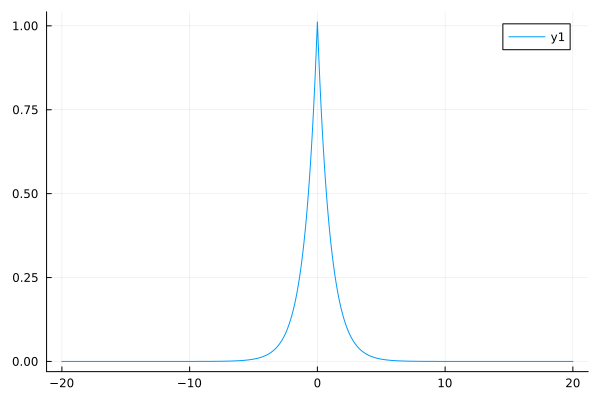

In [87]:
x = range(-20, 20, length=10000)
h = sum(x[2:end].-x[1:end-1])/(length(x)-1)

ψ = Ψ.(x,B,C1,C2,W1,W2)
plot(x,ψ)
# NO EM FUNCIONA EL PYPLOT AIXI QUE HE TRET TOTES LES LABELS I TAL PER A QUE NO EM DONI ERRORS. SORRY :(
#xlabel("x");
#ylabel("ψ(x)");

### Computation of the local energy

In [88]:
d2ψ  =  (ψ[3:end] .- 2.0*ψ[2:end-1] .+ ψ[1:end-2]) ./ h^2
Tloc = -0.5*d2ψ ./ ψ[2:end-1]
Vloc =  0.5*x[2:end-1].^2
Eloc =  Tloc .+ Vloc;

#plot(1:length(Tloc),Tloc,label="Tloc(x)")
#lot(1:length(Vloc),Vloc,label="Tloc(x)");
#lot(1:length(Eloc),Eloc,label="Eloc(x)");
#lot(1:length(Eloc),ψ[2:end-1].^2,label="ψ²(x)")
#plot(1:length(Eloc),ψ[2:end-1].^2 .* Eloc,label="ψ²·Eloc")
#location = "best"
#legend_fontsize = 10
#legend(fontsize=14,handletextpad=0.4,loc=location,frameon=false);

In [89]:
function Simpson(f,h)
    Nf = length(f)
    s  = 2.0*ones(Nf)
    s[2:2:end-1] .*= 2.0
    s[1] = s[end]  = 1.0
    sum(s.*f)*h/3.0
end;

### Energy

In [90]:
Simpson(ψ[2:end-1].^2 .* Eloc,h) / Simpson(ψ[2:end-1].^2,h)

0.7480051263930265

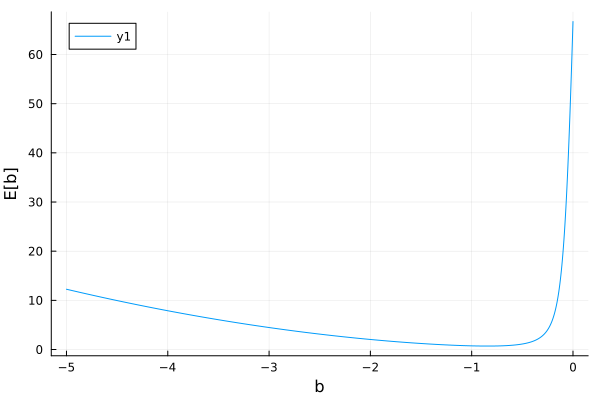

In [91]:
B_range  = range(-5, 0.0001, length=1000);
x = range(-20, 20, length=10000)
h = sum(x[2:end].-x[1:end-1])/(length(x)-1)
energies = ones(1000)
for i in range(1,length(B_range))
    B=B_range[i]
    ψ = Ψ.(x,B,C1,C2,W1,W2)
    d2ψ  =  (ψ[3:end] .- 2.0*ψ[2:end-1] .+ ψ[1:end-2]) ./ h^2
    Tloc = -0.5*d2ψ ./ ψ[2:end-1]
    Vloc =  0.5*x[2:end-1].^2
    Eloc =  Tloc .+ Vloc;
    energies[i]=Simpson(ψ[2:end-1].^2 .* Eloc,h) / Simpson(ψ[2:end-1].^2,h)
end
plot(B_range,energies)
xlabel!("b")
ylabel!("E[b]")

In [92]:
minimum(energies)

0.7059210780175956

In [93]:
function Ψ(x,b,c1,c2,w1,w2)
    if x<0
        return exp(-x*b)*(1.0+exp(c1-x*W1))*(1.0+exp(c2-x*W2))
    end
    return exp(x*b)*(1.0+exp(c1+x*W1))*(1.0+exp(c2+x*W2))
end;

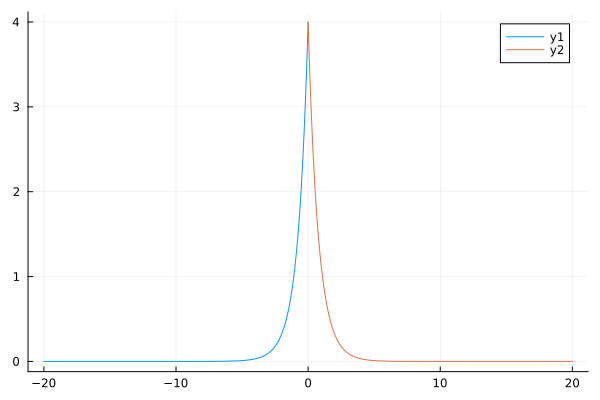

In [94]:
B  = -1.0
C1 = 0
C2 = 0
W = -0.3
W1 = W
W2 = W

x = range(-20, 0, length=10000)
h = sum(x[2:end].-x[1:end-1])/(length(x)-1)

ψ = Ψ.(x,B,C1,C2,W1,W2)
plot(x,ψ)
B  = -1.0
C1 = 0
C2 = 0
W = -0.3
W1 = W
W2 = W
x = range(0, 20, length=10000)
h = sum(x[2:end].-x[1:end-1])/(length(x)-1)

ψ = Ψ.(x,B,C1,C2,W1,W2)
plot!(x,ψ)

In [95]:
function Ψ(x,b,c,w)
    M = length(c)
    M == length(w)
    prod = 1
    if x<0
        for i in 1:M
            prod *= 1+exp(c[i]-x*w[i])
        end
        return exp(-x*b)*prod
    end
    for i in 1:M
        prod *= 1+exp(c[i]+x*w[i])
    end
    return exp(x*b)*prod
end;

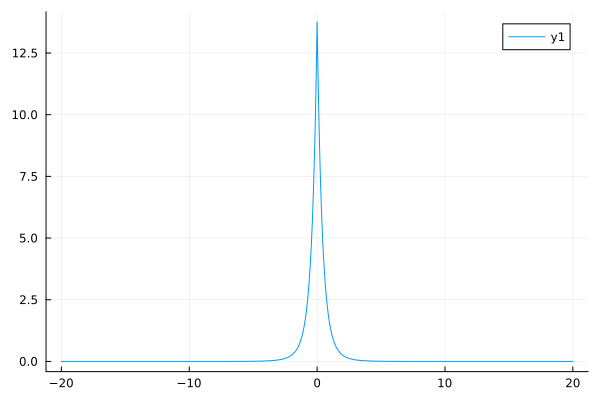

In [96]:
w = [-1.,-1.]
c = [1.,1.]
b= -1.
x = range(-20, 20, length=10000)
x_vec = Array(x)
h = sum(x[2:end].-x[1:end-1])/(length(x)-1)

ψ = ones(length(x_vec))
for i in 1:length(x_vec)
    ψ[i] = Ψ(x_vec[i],b,c,w)
end
plot(x,ψ)

# Gaussian Ansatz

$$\Psi(x) = \sum_{\{\bf h\}}e^{-\lambda x^2+x b+\bf{c}'\bf{h}+x\bf{W}\bf{h}}$$

In [97]:
function ψG(x,λ,b,c,w)
    M = length(c) # number of hidden units
    prod = 1
    for i in 1:M
        prod *= 1+exp(c[i]+x*w[i])
    end
    return exp(-λ*x^2+x*b)*prod
end;

In [5]:
ψG(0,1. -5im,1. - 5im,1. +2im,1.)

-0.13120438375681354 + 2.4717266720048188im

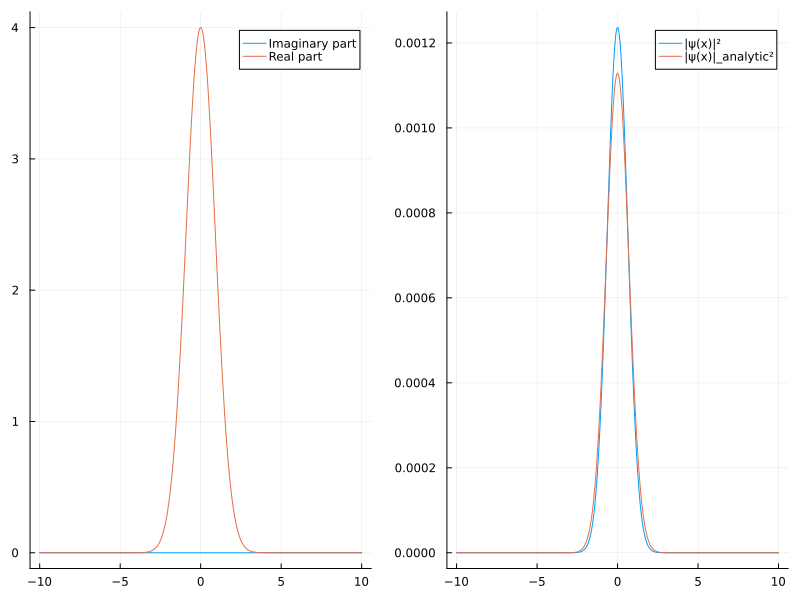

In [105]:
N = 5

c = Complex.(randn(N),randn(N))
w = Complex.(randn(N),randn(N))

λ = 0.6
b = 0. 
c = [(0. +0im),(0. +0im)]
w = [(0. +0im),(0. +0im)]


x = range(-10, 10, length=10000)
x_vec = Array(x)
h = sum(x[2:end].-x[1:end-1])/(length(x)-1)

y = Complex.(ones(length(x_vec)))
y_analytic = Complex.(ones(length(x_vec)))

for i in 1:length(x_vec)
    y[i] = ψG(x_vec[i],λ,b,c,w)
    y_analytic[i] = ψG(x_vec[i],0.5,0.,0.,0.)
end

# do modulus square of y

plot1 = plot(x_vec, imag(y),label="Imaginary part")
plot!(x_vec, real(y), label="Real part")
plot!(size=(800,600))


plot2 = plot(x_vec, abs.(y).^2/sum(abs.(y).^2), label="|ψ(x)|²")
plot!(x_vec, abs.(y_analytic).^2/sum(abs.(y_analytic).^2), label="|ψ(x)|_analytic²")
plot!(size=(800,600))


plot(plot1, plot2, layout = grid(1, 2))


#plot(x,y.^2/sum(y.^2))

In [106]:
d2ψ  =  (y[3:end] .- 2.0*y[2:end-1] .+ y[1:end-2]) ./ h^2
Tloc = -0.5*d2ψ ./ y[2:end-1]
Vloc =  0.5*x[2:end-1].^2
Eloc =  Tloc .+ Vloc;

In [107]:
print(Simpson(y[2:end-1].^2 .* Eloc,h))

13.159904302045435 + 0.0im

In [108]:
print(Simpson(y[2:end-1].^2,h))

25.888345500742684 + 0.0im

In [109]:
Simpson(y[2:end-1].^2 .* Eloc,h) / Simpson(y[2:end-1].^2,h)

0.5083331532974135 + 0.0im

In [110]:
function energy(λ, b, c, w, xmin=-10, xmax=10, n=100000)
    x = range(xmin, xmax, length=n)
    x_vec = Array(x)
    h = sum(x[2:end].-x[1:end-1])/(length(x)-1)
    
    y = ones(length(x_vec))
    for i in 1:length(x_vec)
        y[i] = ψG(x_vec[i],λ,b,c,w)
    end
    d2ψ  =  (y[3:end] .- 2.0*y[2:end-1] .+ y[1:end-2]) ./ h^2
    Tloc = -0.5*d2ψ ./ y[2:end-1]
    Vloc =  0.5*x[2:end-1].^2
    Eloc =  Tloc .+ Vloc
    return Simpson(y[2:end-1].^2 .* Eloc,h) / Simpson(y[2:end-1].^2,h)
end;

In [115]:
range_λ = Array(range(0.4,1,length=50))
array_energy=ones(length(range_λ))
for (i, λ) in enumerate(range_λ)
    array_energy[i]=energy(λ, b, c, w)
end
plot(range_λ,array_energy, legend=false)
# horizontal line in y = 0.5
plot!([0.4,1],[0.5,0.5],line=(:black, :dash),label="E[λ]=0.5")
xlabel!("λ")
ylabel!("E[λ]")
savefig("out/energy_lambda_other_0.png")

"/home/pfargas/Desktop/PhD/1D-Variational-RBM/out/energy_lambda_other_0.png"

In [79]:
print(energy(0.5, b, c, w))

LoadError: InexactError: Float64(-5.894274123920233e-9 + 1.578101505696758e-8im)

----------------------
# ACABA AQUÍ

In [ ]:
gaussian2d(x,y,A,x0,y0,σx=1.0,σy=1.0) = A*exp(-((x-x0)^2/(2*σx^2)+(y-y0)^2/(2*σy^2)))

x = range(-10, 10; length=101)
y = range(-10, 10; length=101)
f1 = -gaussian2d.(x', t,1.,0.5,-0.7)
f2 = -gaussian2d.(x', t,0.4,-7,3)

landscape = f1.+f2

function landscape(
surface(x, y, landscape; colorbar=false,
    xlabel="t", ylabel="x", zlabel="T",
    camera=(30, 20), color=reverse(cgrad(:RdYlBu_11)))


In [ ]:
function metropolis(landscape, x0, y0, steps, T, A1, A2, c1, c2, σ1x, σ1y, σ2x, σ2y, x_min, x_max, y_min, y_max)

In [ ]:
Ψ(100.0,B,C1,C2,W1,W2)

We want that $\Psi\to 0$ as $x\to \pm \infty$. In this case, it is not the behaviour. Because the wavefuntion is not 0 anywhere, the excited states are not gonna be reproduced, so it should converge to the ground state. If the first condition is not satisfied...

Useful function

In [ ]:
function σ(x)
    return 1/(1+ℯ^(-x))
end

In [ ]:
x = range(-20, 20, length=100)
y = σ.(x)
plot(x,y)

## Variational Energy

Definition of the variational energy

In [ ]:
using QuadGK

function numerator(x,b,c1,c2,W1,W2)
    σ1=σ(c1+x*W1)
    σ2=σ(c2+x*W2)
    ξ=b^2 + 2*b*(W1*σ1 + W2*σ2)+(W1^2)*σ1+(W2^2)*σ2+2*W1*W2*σ1*σ2
    return (Ψ(x,b,c1,c2,W1,W2))^2*(x^2-ξ)
end



function energy(b,c1,c2,W1,W2,inf=-20,sup=20)
    integral_num, err    = quadgk(x->numerator(x,b,c1,c2,W1,W2), inf,sup)
    integral_denom, err2 = quadgk(x->((Ψ(x,b,c1,c2,W1,W2))^2), inf,sup)
    return 0.5*integral_num/integral_denom
end

In [ ]:
energy(-1,0,0,-1,-1,0,40)

In [ ]:
x = range(0, 1, length=100)
y = energy.(-1,0,0,-x,-x,0,20)
plot(x,y)
title!("Wnweg")
xlabel!("W")
ylabel!("Energy")

## Gradient of the Variational Energy with respect to the RBM parameters

Definition of the gradient of some parts of the full grad

In [ ]:
function ∇ξ(x,b,c1,c2,W1,W2)
    σ1  = σ(c1+x*W1)
    σ2  = σ(c2+x*W2)

    ∂b  = 2(b+σ1*W1+σ2*W2)
    ∂c1 = 2*b*W1*σ1*(1-σ1) + W1^2*σ1*(1-σ1) + 2*W1*W2*σ1*(1-σ1)*σ2
    ∂c2 = 2*b*W2*σ2*(1-σ2) + W2^2*σ2*(1-σ2) + 2*W1*W2*σ2*(1-σ2)*σ1
    ∂W1 = 2*b*(σ1+W1*σ1*(1-σ1)*x) + 2*W1*σ1 + W1^2*σ1*(1-σ1)*x + 2*σ2*W2*(σ1+W1*σ1*(1-σ1)*x)
    ∂W2 = 2*b*(σ2+W2*σ2*(1-σ2)*x) + 2*W2*σ2 + W2^2*σ2*(1-σ2)*x + 2*σ1*W1*(σ2+W2*σ2*(1-σ2)*x)
    return ∂b+∂c1+∂c2+∂W1+∂W2
end

function ∇Ψ(x,b,c1,c2,W1,W2)
    σ1  = σ(c1+x*W1)
    σ2  = σ(c2+x*W2)
    return Ψ(x,b,c1,c2,W1,W2) * (σ1+σ2+x*(1+σ1+σ2))

